In [12]:
import pandas
import matplotlib.pyplot as plt

pga = pandas.read_csv('pga.csv')
pga = pga[0:200]

pga1 = pga['par3.birdiepct']
pga2 = pga['totalmoney']
pga2 = pga2.drop(148).drop(183).drop(119).drop(180).drop(166).drop(124).drop(172)
pga1 = pga1.drop(148).drop(183).drop(119).drop(180).drop(166).drop(124).drop(172)

sorted_pga2 = pga2.sort_values(ascending=False)



pga1.index = list(range(len(pga1)))
pga2.index = list(range(len(pga2)))
print(pga1)

0      16.03
1      12.70
2      11.87
3      14.57
4      14.08
5      12.79
6      13.73
7      12.78
8      10.60
9       9.04
10     15.19
11     14.58
12     14.12
13     11.07
14     15.55
15     13.93
16     11.79
17     14.25
18     16.89
19     14.12
20     15.06
21      9.60
22     12.31
23     12.27
24     10.55
25     13.92
26     11.03
27     16.51
28     14.34
29     15.92
       ...  
163    14.58
164    11.05
165    14.84
166    13.15
167    12.13
168    14.25
169    13.96
170    13.72
171    16.43
172    11.34
173    14.98
174    10.22
175     8.78
176    14.51
177    12.22
178     9.83
179     8.97
180    12.93
181    13.92
182    14.78
183    11.95
184    10.03
185    12.12
186    12.44
187     9.47
188    14.46
189    13.51
190    12.09
191    14.58
192    14.59
Name: par3.birdiepct, Length: 193, dtype: float64


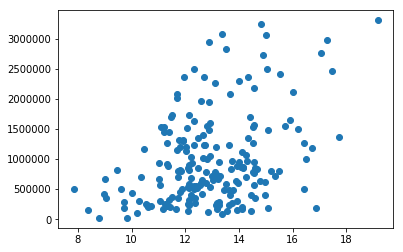

In [26]:
plt.scatter(pga1, pga2)

plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np

print('Shape of the series:', pga1.shape)
print('Shape of the newaxis:',pga1[:, np.newaxis].shape)

lm = LinearRegression()
lm.fit(pga1[:, np.newaxis],pga2)
theta1=lm.coef_[0]
print(theta1)

print(pga2[0])

Shape of the series: (193,)
Shape of the newaxis: (193, 1)
151294.96227780243
2103730


245843698797.3031


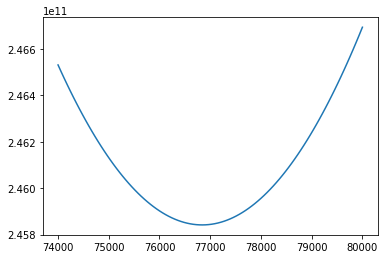

In [20]:
def cost(theta0, theta1, x, y):
    J=0
    m=len(x)
    for i in range(m):
        h = theta1*x[i]+theta0
        J+=(h-y[i])**2
    J/=(2*m)
    return J

print(cost(0,77000,pga1,pga2))

theta0 = 0
theta1s = np.linspace(74000,80000,100)
costs=[]
for theta1 in theta1s:
    costs.append(cost(theta0, theta1, pga1,pga2))

plt.plot(theta1s, costs)
plt.show()

In [4]:
def partial_cost_theta1(theta0, theta1, x, y):
    h = theta0 + theta1*x
    diff = (h-y)*x
    partial = diff.sum()/(x.shape[0])
    return partial

partia1 = partial_cost_theta1(0,1, pga1,pga2)
print(partia1)

def partial_cost_theta0(theta0,theta1,x,y):
    h = theta0 + theta1*x
    diff = (h-y)
    partial = diff.sum()/(x.shape[0])
    return partial

partia0 = partial_cost_theta0(1,1, pga1,pga2)
print(partia0)

-13128274.078158552
-974379.7246632123


c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
c:\users\administrator\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


Theta1 =  -5.777230521852448e+173


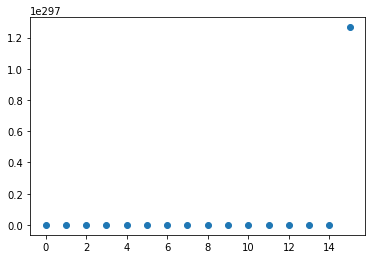

In [9]:
def gradient_descent(x,y,alpha=0.1,theta0=0,theta1=0):
    max_epochs = 1000
    counter=0
    c = cost(theta1,theta0,pga1,pga2)
    costs = [c]
    convergence_thres= 0.000001
    cprev=c+10
    theta0s=[theta0]
    theta1s=[theta1]
    
    while(np.abs(cprev-c)>convergence_thres) and (counter<max_epochs):
        cprev = c
        update0 = alpha*partial_cost_theta0(theta0,theta1,x,y)
        update1 = alpha*partial_cost_theta1(theta0,theta1,x,y)
        
        theta0-=update0
        theta1-=update1
        
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        c=cost(theta0,theta1,pga1,pga2)
        
        costs.append(c)
        counter+=1
    return{'theta0': theta0,'theta1':theta1,'costs':costs}

print('Theta1 = ', gradient_descent(pga2,pga1)['theta1'])
descend=gradient_descent(pga2,pga1,alpha=0.01)
plt.scatter(range(len(descend['costs'])),descend['costs'])
plt.show()